In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best10.csv")
df = df.drop_duplicates()
print(df.head())

       KLHL21        LZIC       NLRP6    MIR4537        HBA1  LOC101928682  \
0  408.378949  119.082494  162.813354  12.782867  422.507380      1.000000   
1  253.319773  118.435219   81.150057  16.449336   87.729792      1.000000   
2  532.444640  122.686792  180.421753   4.811247  258.203576      4.009372   
3  391.074568  132.363700  409.124164   2.406613   93.857896      1.000000   
4  399.819591  139.601812  136.251369  13.401774  751.616158      1.116815   

         NFIX        JUND   MIR663AHG         PXK  Results  
0  173.577873  294.678714  956.023865  297.369844        1  
1  100.889260  276.348843  652.490325  233.580570        1  
2  139.526156  255.797952  230.137969  304.712294        1  
3   57.758705  175.682729  454.849806  204.562082        1  
4  211.077941  243.465561   64.775241  385.301002        1  


In [3]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [4]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [5]:

df.describe()

,KLHL21,LZIC,NLRP6,MIR4537,HBA1,LOC101928682,NFIX,JUND,MIR663AHG,PXK,Results
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,341.190567,136.380108,169.348899,9.362595,5631.022563,1.613136,201.365632,266.508239,681.840503,256.507771,0.431034
std,132.385307,48.225795,134.415089,8.547251,22376.681531,1.611541,451.931080,291.919740,1065.674828,75.158344,0.497369
min,66.370880,80.726335,5.006662,1.000000,5.788649,1.000000,6.753424,59.757097,8.483496,92.618381,0.000000
25%,262.744890,113.147906,102.645681,3.681635,45.582804,1.000000,69.344060,123.953297,83.343558,214.513117,0.000000
50%,315.817003,126.301624,137.750146,5.962768,225.706240,1.000000,94.318849,197.398628,300.196621,247.881034,0.000000
75%,393.077684,143.457188,191.200896,12.593158,757.331937,1.058323,155.725190,296.450687,770.164663,282.903629,1.000000
max,1136.361050,467.984177,848.504583,39.113255,165229.888600,9.398235,3351.676152,2298.238085,7208.064725,707.927191,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['KLHL21', 'LZIC', 'NLRP6', 'MIR4537', 'HBA1', 'LOC101928682', 'NFIX', 'JUND', 'MIR663AHG', 'PXK', 'Results']
11


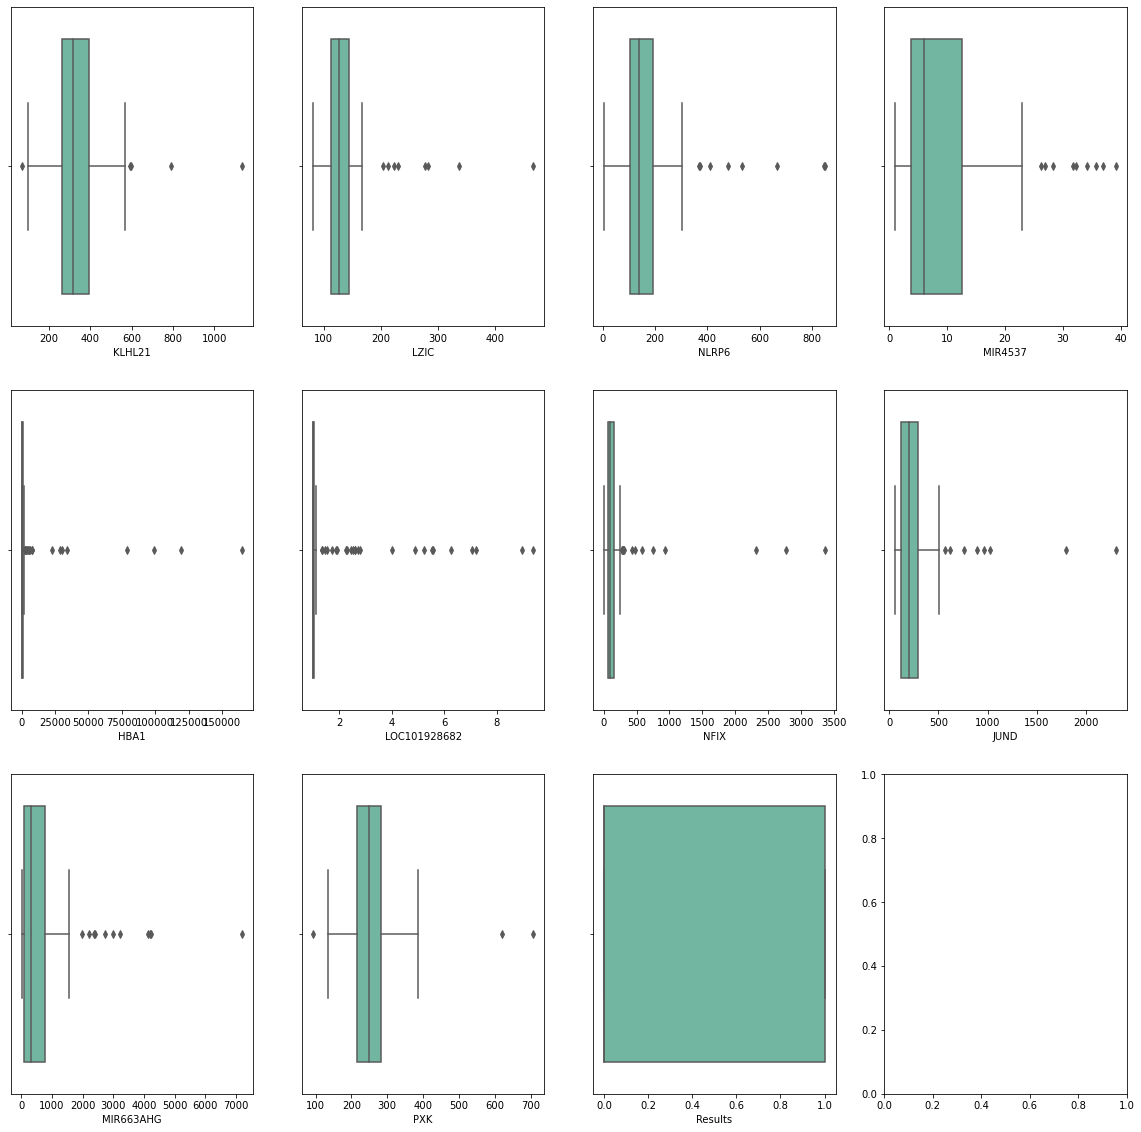

In [7]:
fig, axes = plt.subplots(3,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    
    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['KLHL21', 'LZIC', 'NLRP6', 'MIR4537', 'HBA1', 'LOC101928682', 'NFIX',
       'JUND', 'MIR663AHG', 'PXK', 'Results'],
      dtype='object')
     KLHL21      LZIC     NLRP6   MIR4537      HBA1  LOC101928682      NFIX  \
0  0.319637  0.099046  0.187086  0.309154  0.002522      0.000000  0.049874   
1  0.174720  0.097374  0.090271  0.405353  0.000496      0.000000  0.028143   
2  0.435587  0.108353  0.207961  0.099998  0.001528      0.358334  0.039694   
3  0.303464  0.133341  0.479097  0.036906  0.000533      0.000000  0.015249   
4  0.311637  0.152032  0.155596  0.325393  0.004514      0.013909  0.061085   

       JUND  MIR663AHG       PXK  Results  
0  0.104947   0.131610  0.332762      1.0  
1  0.096758   0.089451  0.229092      1.0  
2  0.087578   0.030787  0.344695      1.0  
3  0.051788   0.061999  0.181931      1.0  
4  0.082068   0.007819  0.475668      1.0  


In [9]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    66
1    50
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

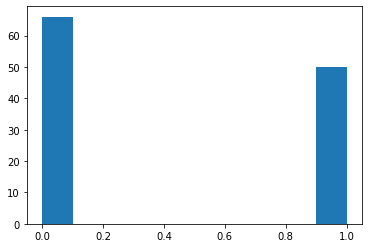

In [10]:
plt.hist(y)

1    66
0    66
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

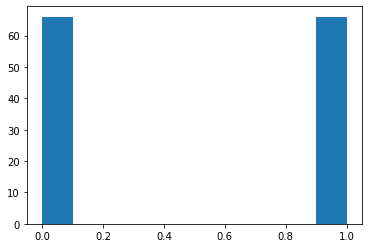

In [11]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [12]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  68.939
Standed deviation :  6.818
CV value :  3
Parameters :  {}
Accuracy :  71.212
Standed deviation :  1.071
CV value :  4
Parameters :  {}
Accuracy :  68.939
Standed deviation :  7.538
CV value :  5
Parameters :  {}
Accuracy :  72.051
Standed deviation :  8.971


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 50}
Accuracy :  81.061
Standed deviation :  0.758
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  78.788
Standed deviation :  3.863
CV value :  4
Parameters :  {'random_state': 1}
Accuracy :  78.030
Standed deviation :  8.124
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  78.832
Standed deviation :  8.832


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 13}
Accuracy :  68.939
Standed deviation :  2.273
CV value :  3
Parameters :  {'n_neighbors': 11}
Accuracy :  70.455
Standed deviation :  3.214
CV value :  4
Parameters :  {'n_neighbors': 13}
Accuracy :  71.212
Standed deviation :  6.604
CV value :  5
Parameters :  {'n_neighbors': 7}
Accuracy :  71.966
Standed deviation :  9.464


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  58.333
Standed deviation :  2.273
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  64.394
Standed deviation :  1.071
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  63.636
Standed deviation :  7.726
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  64.387
Standed deviation :  4.512


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  48.485
Standed deviation :  3.030
CV value :  3
Parameters :  {}
Accuracy :  52.273
Standed deviation :  0.000
CV value :  4
Parameters :  {}
Accuracy :  49.242
Standed deviation :  13.948
CV value :  5
Parameters :  {}
Accuracy :  55.442
Standed deviation :  10.465


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  64.394
Standed deviation :  3.788
CV value :  3
Parameters :  {'kernel': 'rbf'}
Accuracy :  70.455
Standed deviation :  1.856
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  69.697
Standed deviation :  9.819
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  71.197
Standed deviation :  7.168


In [18]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 80, 'max_features': 5, 'n_estimators': 100}
Accuracy :  81.818
Standed deviation :  3.030
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 200}
Accuracy :  81.818
Standed deviation :  1.856
CV value :  4
Parameters :  {'max_depth': 100, 'max_features': 2, 'n_estimators': 300}
Accuracy :  84.091
Standed deviation :  4.482
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  83.362
Standed deviation :  7.019
